#  Step 1: Install & Import Dependencies

In [3]:
!pip install transformers -q
!pip install scikit-learn -q

import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
from tqdm import tqdm


# Step 2: Load Dataset

In [6]:
df = pd.read_csv('/kaggle/input/brands-and-product-emotions/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')


# Use only rows where emotion label is either Positive or Negative (for binary classification)
df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Positive emotion', 'Negative emotion'])]

# Map to binary labels
label_map = {'Positive emotion': 1, 'Negative emotion': 0}
df['label'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(label_map)

df = df[['tweet_text', 'label']].dropna()

print(df.head())


                                          tweet_text  label
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...      0
1  @jessedee Know about @fludapp ? Awesome iPad/i...      1
2  @swonderlin Can not wait for #iPad 2 also. The...      1
3  @sxsw I hope this year's festival isn't as cra...      0
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...      1


# Investigation

In [25]:
from collections import Counter

# Suppose your labels are stored in all_labels (list or numpy array)
class_counts = Counter(all_labels)

print("Class distribution:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")


Class distribution:
Class 1: 595 samples
Class 0: 115 samples


In [26]:
# 1) Check for null values in each column
print("Null values per column:")
print(df.isnull().sum())

# 2) Check for any corrupted or problematic values (depends on your context)
# For example, check for empty strings or non-standard values in columns

# Example: For text columns, check how many empty strings or strings with only spaces
for col in df.select_dtypes(include=['object']).columns:
    empty_count = df[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
    print(f"Empty strings in column '{col}': {empty_count}")

# 3) You might also want to check data types or invalid entries
print("\nData types:")
print(df.dtypes)

# Optional: Check unique values in a column to spot anomalies
for col in df.columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique())

Null values per column:
tweet_text    0
label         0
dtype: int64
Empty strings in column 'tweet_text': 0

Data types:
tweet_text    object
label          int64
dtype: object

Unique values in column 'tweet_text':
['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.'
 ...
 'Diller says Google TV &quot;might be run over by the PlayStation and the Xbox, which are essentially ready today.&quot; #sxsw #diller'
 "I've always used Camera+ for my iPhone b/c it has an image stabilizer mode. Suggestions for an iPad cam app w/ same feature? #SXSW #SXSWi"
 'Ipad everywhere. #SXSW {link}']

Unique values in column 'label':
[0 1]


In [27]:
# Check class counts
print(df['label'].value_counts())

# Find the minimum class size
min_size = df['label'].value_counts().min()

# Downsample each class to min_size
balanced_df = pd.concat([
    df[df['label'] == cls].sample(min_size, random_state=42)
    for cls in df['label'].unique()
])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced class counts:")
print(balanced_df['label'].value_counts())


label
1    2978
0     570
Name: count, dtype: int64
Balanced class counts:
label
1    570
0    570
Name: count, dtype: int64


In [29]:
pip install transformers torch sklearn matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import os
import glob

# Define the working directory
output_dir = '/kaggle/working/'

# Delete all files in /kaggle/working/, but NOT subdirectories
for file in glob.glob(os.path.join(output_dir, "*.*")):
    os.remove(file)
    print(f"Removed: {file}")

print("✅ All files in /kaggle/working/ have been deleted.")

Removed: /kaggle/working/roberta_training_curves.png
Removed: /kaggle/working/roberta_confusion_matrix.png
Removed: /kaggle/working/best_roberta.pth
✅ All files in /kaggle/working/ have been deleted.


# Bert Code

Balanced class counts:
label
1    570
0    570
Name: count, dtype: int64


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


Epoch 1: Train Loss=0.6501, Val Loss=0.4315, Train Acc=0.6015, Val Acc=0.8509


Epoch 2: 100%|██████████| 50/50 [00:19<00:00,  2.60it/s]


Epoch 2: Train Loss=0.4148, Val Loss=0.4032, Train Acc=0.8246, Val Acc=0.8158


Epoch 3: 100%|██████████| 50/50 [00:18<00:00,  2.70it/s]


Epoch 3: Train Loss=0.2180, Val Loss=0.3176, Train Acc=0.9273, Val Acc=0.8596


Epoch 4: 100%|██████████| 50/50 [00:18<00:00,  2.65it/s]


Epoch 4: Train Loss=0.1059, Val Loss=0.4217, Train Acc=0.9687, Val Acc=0.8509


Epoch 5: 100%|██████████| 50/50 [00:19<00:00,  2.55it/s]


Epoch 5: Train Loss=0.0711, Val Loss=0.3727, Train Acc=0.9825, Val Acc=0.8596


Epoch 6: 100%|██████████| 50/50 [00:19<00:00,  2.59it/s]


Epoch 6: Train Loss=0.0304, Val Loss=0.5960, Train Acc=0.9925, Val Acc=0.8070


Epoch 7: 100%|██████████| 50/50 [00:19<00:00,  2.62it/s]


Epoch 7: Train Loss=0.0276, Val Loss=0.5039, Train Acc=0.9950, Val Acc=0.8509


Epoch 8: 100%|██████████| 50/50 [00:19<00:00,  2.62it/s]


Epoch 8: Train Loss=0.0237, Val Loss=0.5533, Train Acc=0.9962, Val Acc=0.8684
Early stopping

Final Test Metrics:
Accuracy: 0.7982
Precision: 0.8469
Recall: 0.7281
F1-Score: 0.7830
MCC: 0.6025
MAE: 0.2018
MSE: 0.2018
RMSE: 0.4492
Cohen's Kappa: 0.5965
AUC-ROC: 0.8884
CSI: 0.6434


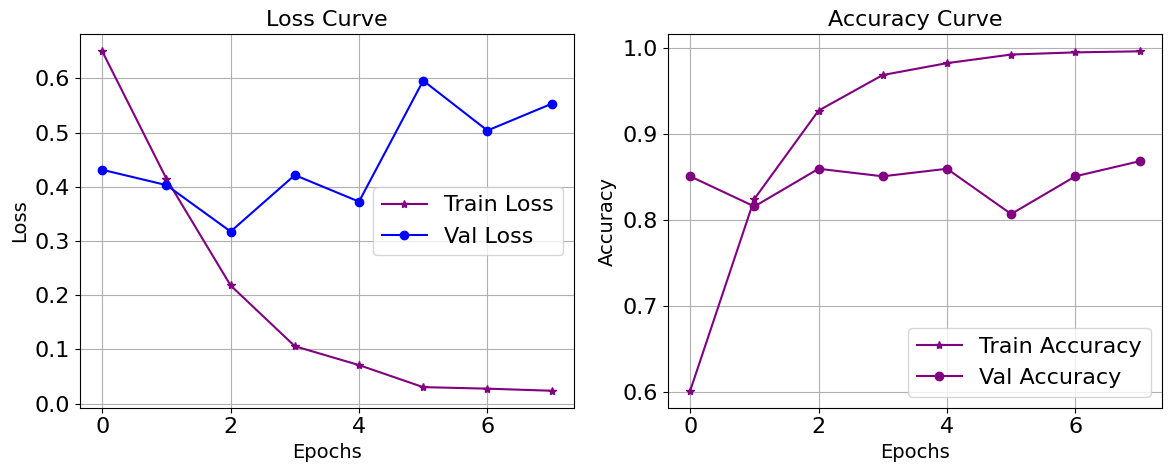

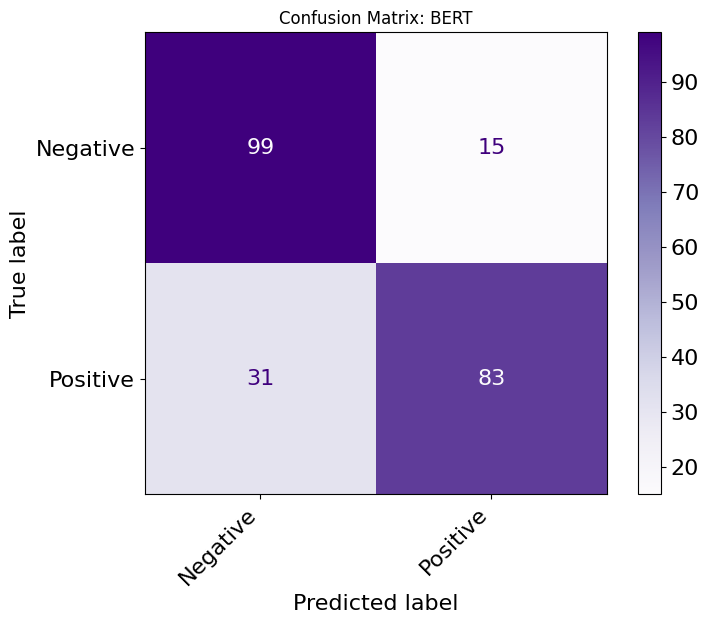

In [38]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
    precision_recall_fscore_support, matthews_corrcoef,
    mean_absolute_error, mean_squared_error,
    cohen_kappa_score, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# === 1. Balance dataset by downsampling ===
min_size = df['label'].value_counts().min()
balanced_df = pd.concat([
    df[df['label'] == cls].sample(min_size, random_state=42)
    for cls in df['label'].unique()
]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced class counts:")
print(balanced_df['label'].value_counts())

# === 2. Split into 70% train, 20% test, 10% val ===
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    balanced_df['tweet_text'], balanced_df['label'],
    test_size=0.3, stratify=balanced_df['label'], random_state=42
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels,
    test_size=2/3, stratify=temp_labels, random_state=42
)

# === 3. Tokenization ===
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts.tolist()
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            max_length=self.max_len,
            padding='max_length',
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

train_dataset = TweetDataset(train_texts, train_labels, tokenizer)
val_dataset = TweetDataset(val_texts, val_labels, tokenizer)
test_dataset = TweetDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# === 4. Model Setup ===
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# === 5. Training ===
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []
best_val_loss = float('inf')
patience = 5
num_epochs = 30
trigger_times = 0

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_acc = correct_train / len(train_dataset)

    model.eval()
    val_loss = 0
    correct_val = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()
            preds = torch.argmax(outputs.logits, dim=1)
            correct_val += (preds == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct_val / len(val_dataset)

    train_loss_list.append(avg_train_loss)
    val_loss_list.append(avg_val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        trigger_times = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping")
            break

# === 6. Load Best Model and Evaluate ===
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
all_preds, all_labels, all_probs = [], [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=1)[:, 1]
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# === 7. Metrics ===
test_acc = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
mcc = matthews_corrcoef(all_labels, all_preds)
mae = mean_absolute_error(all_labels, all_preds)
mse = mean_squared_error(all_labels, all_preds)
rmse = np.sqrt(mse)
kappa = cohen_kappa_score(all_labels, all_preds)
auc_roc = roc_auc_score(all_labels, all_probs)
cm = confusion_matrix(all_labels, all_preds)
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
CSI = TP / (TP + FN + FP) if (TP + FN + FP) > 0 else 0

print("\nFinal Test Metrics:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"CSI: {CSI:.4f}")

# === 8. Plot Loss and Accuracy Curves ===
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss', color='purple', marker='*')
plt.plot(val_loss_list, label='Val Loss', color='blue', marker='o')

plt.title("Loss Curve", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True)
plt.legend()

# Accuracy curve

plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Train Accuracy', color='purple', marker='*')
plt.plot(val_acc_list, label='Val Accuracy', color='purple', marker='o')

plt.title("Accuracy Curve", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('Bert1_training_curves.png', dpi=300)
plt.show()


# === 9. Styled Confusion Matrix (Purple + Saved as PDF) ===
labels = ['Negative', 'Positive']
conf_matrix = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Purples, values_format='d')

plt.title('Confusion Matrix: BERT', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.rcParams.update({'font.size': 16})

plt.savefig('/kaggle/working/confusion_matrix.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


# RoBerta

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


Epoch 1: Train Loss=0.6217, Val Loss=0.4203, Train Acc=0.6679, Val Acc=0.7456


Epoch 2: 100%|██████████| 50/50 [00:19<00:00,  2.59it/s]


Epoch 2: Train Loss=0.3989, Val Loss=0.3577, Train Acc=0.8521, Val Acc=0.8421


Epoch 3: 100%|██████████| 50/50 [00:18<00:00,  2.68it/s]


Epoch 3: Train Loss=0.2998, Val Loss=0.3572, Train Acc=0.8972, Val Acc=0.8509


Epoch 4: 100%|██████████| 50/50 [00:19<00:00,  2.62it/s]


Epoch 4: Train Loss=0.1906, Val Loss=0.2893, Train Acc=0.9336, Val Acc=0.8684


Epoch 5: 100%|██████████| 50/50 [00:19<00:00,  2.50it/s]


Epoch 5: Train Loss=0.1395, Val Loss=0.3011, Train Acc=0.9599, Val Acc=0.8947


Epoch 6: 100%|██████████| 50/50 [00:19<00:00,  2.56it/s]


Epoch 6: Train Loss=0.0953, Val Loss=0.3633, Train Acc=0.9674, Val Acc=0.8947


Epoch 7: 100%|██████████| 50/50 [00:19<00:00,  2.61it/s]


Epoch 7: Train Loss=0.0554, Val Loss=0.3190, Train Acc=0.9787, Val Acc=0.8860


Epoch 8: 100%|██████████| 50/50 [00:19<00:00,  2.61it/s]


Epoch 8: Train Loss=0.0259, Val Loss=0.5598, Train Acc=0.9937, Val Acc=0.8596


Epoch 9: 100%|██████████| 50/50 [00:19<00:00,  2.58it/s]


Epoch 9: Train Loss=0.0272, Val Loss=0.6596, Train Acc=0.9937, Val Acc=0.8509
Early stopping

Final Test Metrics:
Accuracy: 0.8509
Precision: 0.8571
Recall: 0.8421
F1-Score: 0.8496
MCC: 0.7019
MAE: 0.1491
MSE: 0.1491
RMSE: 0.3862
Cohen's Kappa: 0.7018
AUC-ROC: 0.9047
CSI: 0.7385


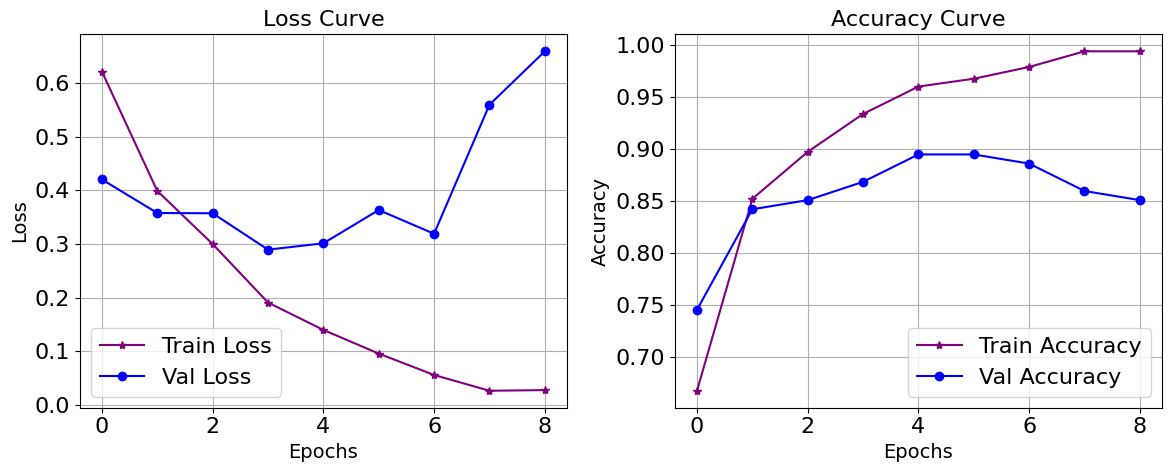

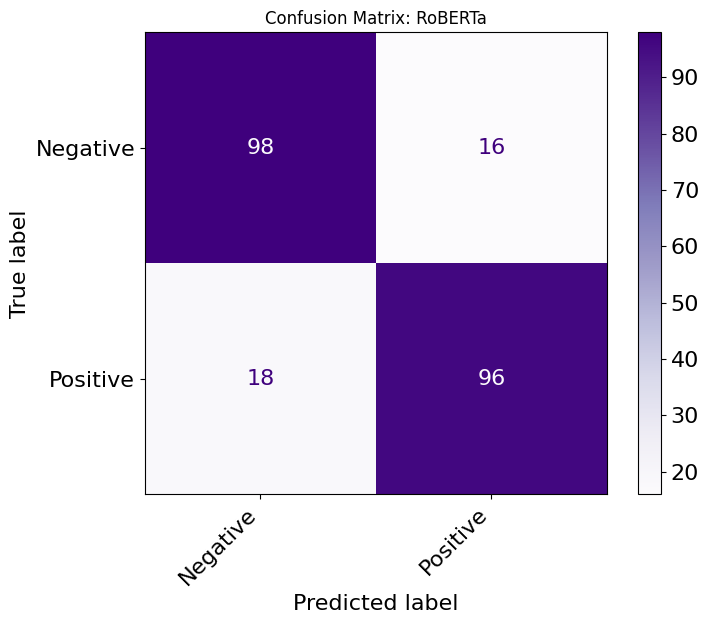

In [40]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
    precision_recall_fscore_support, matthews_corrcoef,
    mean_absolute_error, mean_squared_error,
    cohen_kappa_score, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# === 1. Balance dataset by downsampling ===
min_size = df['label'].value_counts().min()
balanced_df = pd.concat([
    df[df['label'] == cls].sample(min_size, random_state=42)
    for cls in df['label'].unique()
]).sample(frac=1, random_state=42).reset_index(drop=True)

# === 2. Split into train/val/test (70/10/20) ===
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    balanced_df['tweet_text'], balanced_df['label'],
    test_size=0.3, stratify=balanced_df['label'], random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels,
    test_size=2/3, stratify=temp_labels, random_state=42
)

# === 3. Tokenization ===
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts.tolist()
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            max_length=self.max_len,
            padding='max_length',
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

train_dataset = TweetDataset(train_texts, train_labels, tokenizer)
val_dataset = TweetDataset(val_texts, val_labels, tokenizer)
test_dataset = TweetDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# === 4. Model Setup ===
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# === 5. Training ===
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []
best_val_loss = float('inf')
patience = 5
num_epochs = 30
trigger_times = 0

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == labels).sum().item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_acc = correct_train / len(train_dataset)

    model.eval()
    val_loss = 0
    correct_val = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()
            preds = torch.argmax(outputs.logits, dim=1)
            correct_val += (preds == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_acc = correct_val / len(val_dataset)

    train_loss_list.append(avg_train_loss)
    val_loss_list.append(avg_val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        trigger_times = 0
        torch.save(model.state_dict(), 'best_roberta.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping")
            break

# === 6. Load Best Model and Evaluate ===
model.load_state_dict(torch.load('best_roberta.pth'))
model.eval()
all_preds, all_labels, all_probs = [], [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=1)[:, 1]
        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# === 7. Metrics ===
test_acc = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
mcc = matthews_corrcoef(all_labels, all_preds)
mae = mean_absolute_error(all_labels, all_preds)
mse = mean_squared_error(all_labels, all_preds)
rmse = np.sqrt(mse)
kappa = cohen_kappa_score(all_labels, all_preds)
auc_roc = roc_auc_score(all_labels, all_probs)
cm = confusion_matrix(all_labels, all_preds)
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
CSI = TP / (TP + FN + FP) if (TP + FN + FP) > 0 else 0

print("\nFinal Test Metrics:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"CSI: {CSI:.4f}")

# === 8. Plot Loss and Accuracy Curves ===
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Train Loss', color='purple', marker='*')
plt.plot(val_loss_list, label='Val Loss', color='blue', marker='o')
plt.title("Loss Curve", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Train Accuracy', color='purple', marker='*')
plt.plot(val_acc_list, label='Val Accuracy', color='blue', marker='o')
plt.title("Accuracy Curve", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('/kaggle/working/roberta_training_curves.png', dpi=300)
plt.show()

# === 9. Confusion Matrix ===
labels = ['Negative', 'Positive']
conf_matrix = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Purples, values_format='d')
plt.title('Confusion Matrix: RoBERTa', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.rcParams.update({'font.size': 16})
plt.savefig('/kaggle/working/roberta_confusion_matrix.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
